# Car Price Prediction - using Multiple Linear Regression

An automobile company outisde US aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

Business Goal - You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### The solution is divided into the following sections:
- Data understanding and exploration
- Data cleaning.
- Data Analysis.
- Data preparation.
- Model building.
- Prediction and Model evaluation.

## Data understanding and exploration

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.metrics import r2_score,mean_squared_error

from scipy.stats import boxcox


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting Display Max columns and display max rows to None so that it displays all the rows and columns which will 
# help us in initial analysis
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
# Importing the dataset
car_df = pd.read_csv("../data/CarPrice_Assignment.csv")

In [4]:
# Checking some rows to get a basic understanding of the data
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
# Checking the dataframe size to understand what amount of data we are dealing with
car_df.shape

(205, 26)

In [6]:
# Checking the dataframe for the datatypes for all the columns
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
# Doing describe to check the spread of values across all numerical fields
car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
# Checking the percentage of missing values across all the columns
round(100*(car_df[car_df.columns].isnull().sum()/len(car_df.index)),2)

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

## Data cleaning

In [9]:
# Before cleaning just checking few rows to get better understanding of the data
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
# Checking whether any duplicate row is present with respect to car id
car_df['car_ID'].nunique()<205

False

In [11]:
# Dropping car id from car dataframe as it is not going to add value to our analysis
car_df = car_df.drop('car_ID',axis=1)

In [12]:
# Dropping car name from car dataframe as generally we know that car name always helps us in determing price
# but here we are loooking for car features hence dropping it
car_df = car_df.drop('CarName',axis=1)

In [13]:
# Dropped symboling variable as I have seen that without it model is performing better
car_df = car_df.drop('symboling',axis=1)

## Data Analysis

In [14]:
# Created a function to plot bar graph between independent variables and price (dependent variable)

def plotBarGraph(df,xLabel,yLabel,graphSize=[]):
    barData = df.plot(kind="bar",figsize=graphSize)
    barData.set_xlabel(xLabel)
    barData.set_ylabel(yLabel)

    for p in barData.patches:
        barData.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2, p.get_height()), ha='center')

In [15]:
# Performing univariate analysis on variables
# Checking distribution of values in "fueltype" feature
car_df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [16]:
# Checking distribution of values in "aspiration" feature
car_df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [17]:
# Checking distribution of values in "carbody" feature
car_df['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [18]:
# Checking distribution of values in "drivewheel" feature
car_df['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [19]:
# Checking distribution of values in "enginelocation" feature
car_df['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [20]:
# Checking distribution of values in "enginetype" feature
car_df['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [21]:
# Checking distribution of values in "cylindernumber" feature
car_df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [22]:
# Checking distribution of values in "fuelsystem" feature
car_df['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [23]:
# car_df['symboling'].value_counts()

In [24]:
#  3 => very high risk
#  2 => high risk
#  1 => moderate risk
#  0 => less risk
# -1 => safe
# -2 => very safe

In [25]:
# symboling_dict_map = {3:'very high risk' , 2:'high risk', 1:'moderate risk', 0:'less risk', -1:'safe', -2:'very safe'}
# car_df['symboling'] = car_df['symboling'].map(symboling_dict_map)

In [26]:
# symboling_dist = pd.pivot_table(car_df,index='symboling',values='price',aggfunc='mean').sort_values(by='symboling',ascending=True)
# plotBarGraph(symboling_dist, 'Symboling', 'Price',[8,5])

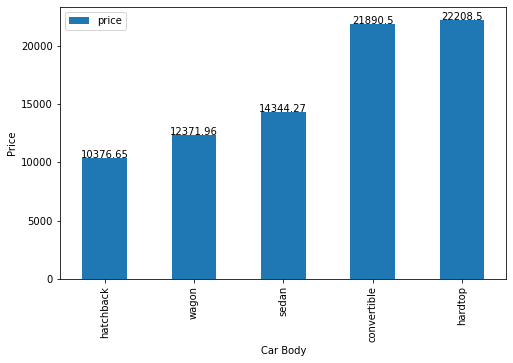

In [27]:
# Created a pivot table and then plotted a bar graph to check how the mean price varies across different car body categories
carbody_dist = pd.pivot_table(car_df,index='carbody',values='price',aggfunc='mean').sort_values(by='price',ascending=True)
plotBarGraph(carbody_dist, 'Car Body', 'Price',[8,5])

In [28]:
# Checking the number of unique engine size's in ascending order
np.array(sorted(car_df['enginesize'].unique()))

array([ 61,  70,  79,  80,  90,  91,  92,  97,  98, 103, 108, 109, 110,
       111, 119, 120, 121, 122, 130, 131, 132, 134, 136, 140, 141, 145,
       146, 151, 152, 156, 161, 164, 171, 173, 181, 183, 194, 203, 209,
       234, 258, 304, 308, 326], dtype=int64)

In [29]:
# Bucketing the engine size across ranges to convert it to a categorical variable
car_df['enginesize_bucket'] = pd.cut(car_df['enginesize'],[0,50,100,150,200,250,300,350],labels=['0-5','50-100','100-150','150-200','200-250','250-300','300-350'])

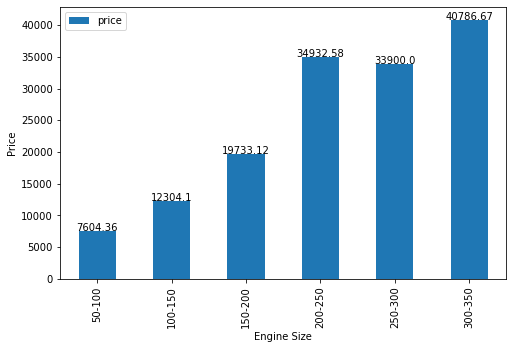

In [30]:
# Created a pivot table and then plotted a bar graph to check how the mean price varies across different engine size buckets
car_enginesize_dist = pd.pivot_table(car_df,index='enginesize_bucket',values='price',aggfunc='mean')
plotBarGraph(car_enginesize_dist, 'Engine Size', 'Price',[8,5])

In [31]:
# Created a model with engine size buckets but at last when try to understand the top 7-10 features which are importance in 
# terms of price prediction then found engine size of different buckets are present as a result we couldn't understand the 
# importance of other features much.
car_df = car_df.drop('enginesize_bucket', axis=1)

In [32]:
# Checking the number of unique peak rpm's in ascending order
np.array(sorted(car_df['peakrpm'].unique()))

array([4150, 4200, 4250, 4350, 4400, 4500, 4650, 4750, 4800, 4900, 5000,
       5100, 5200, 5250, 5300, 5400, 5500, 5600, 5750, 5800, 5900, 6000,
       6600], dtype=int64)

In [33]:
# Bucketing the peak rpm across ranges to convert it to a categorical variable
car_df['peakrpm_bucket'] = pd.cut(car_df['peakrpm'],[4000,4500,5000,5500,6000,6500,7000],labels=['4000-4500','4500-5000','5000-5500','5500-6000','6000-6500','6500-7000'])

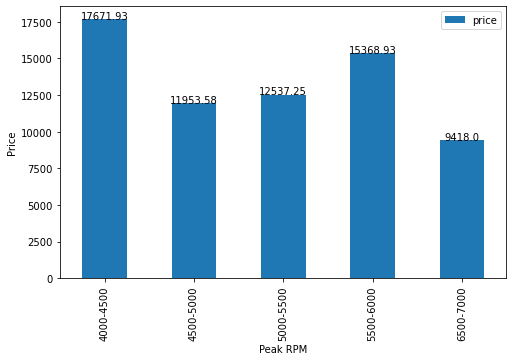

In [34]:
# Created a pivot table and then plotted a bar graph to check how the mean price varies across different peak rpm buckets
car_peakrpm_dist = pd.pivot_table(car_df,index='peakrpm_bucket',values='price',aggfunc='mean')
plotBarGraph(car_peakrpm_dist, 'Peak RPM', 'Price',[8,5])

In [35]:
# Created a model with peakrpm_bucket but found that with or without bucket it didn't create any significant difference.
car_df = car_df.drop('peakrpm_bucket', axis=1)

In [36]:
# Collating all numeric features under one list
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
car_num_cols = list(car_df.select_dtypes(include=numerics).columns)
car_num_cols

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [37]:
# car_categorical = car_df.select_dtypes(include=['object'])
# car_categorical.head()

In [38]:
# Collating all categorical features under one list
car_cat_cols = list(car_df.select_dtypes(exclude=numerics).columns)
car_cat_cols

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [39]:
# Checking the correlation amoung the numerical variables in the dataset
car_corr = car_df[car_num_cols].corr()
car_corr

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


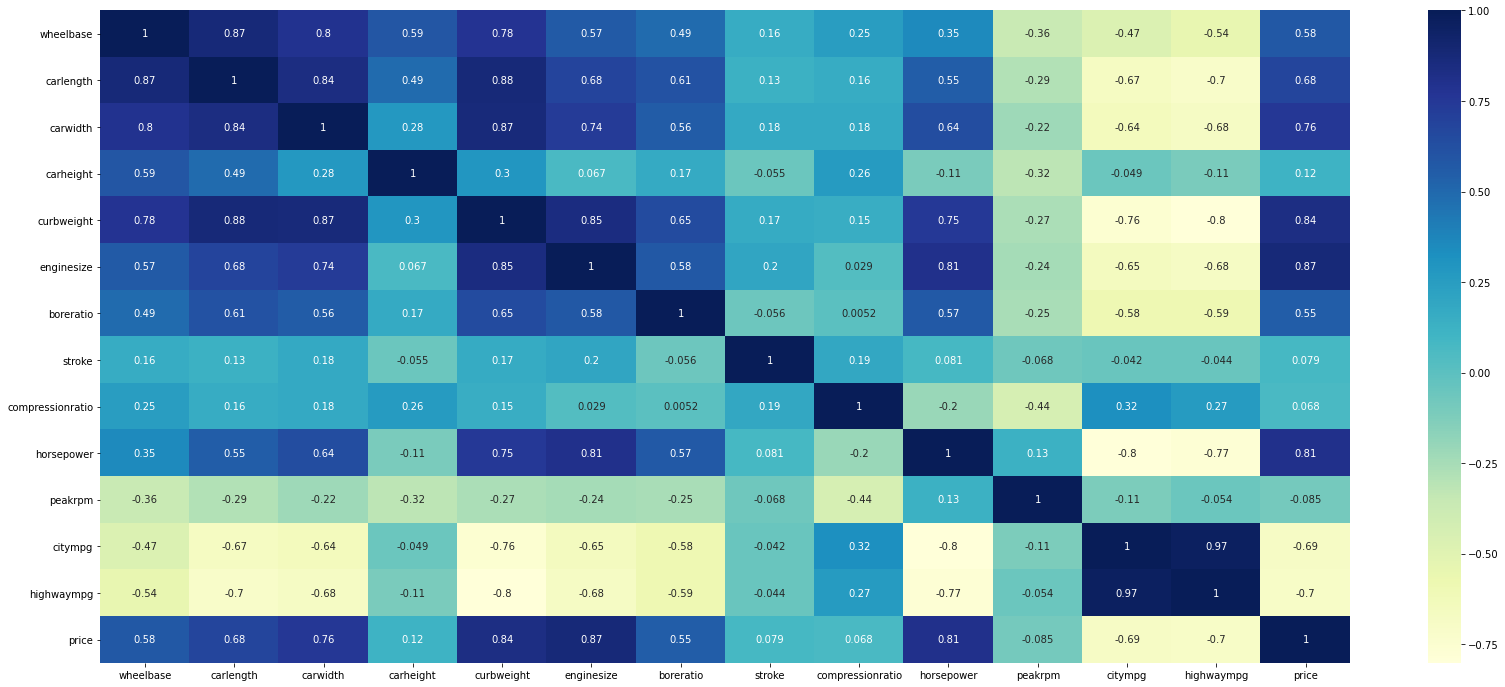

In [40]:
# Plotting the correlation among numerical variables on a heat map
plt.figure(figsize=(28,12))

# plotting heatmap
sns.heatmap(car_corr, cmap="YlGnBu", annot=True)
plt.show()

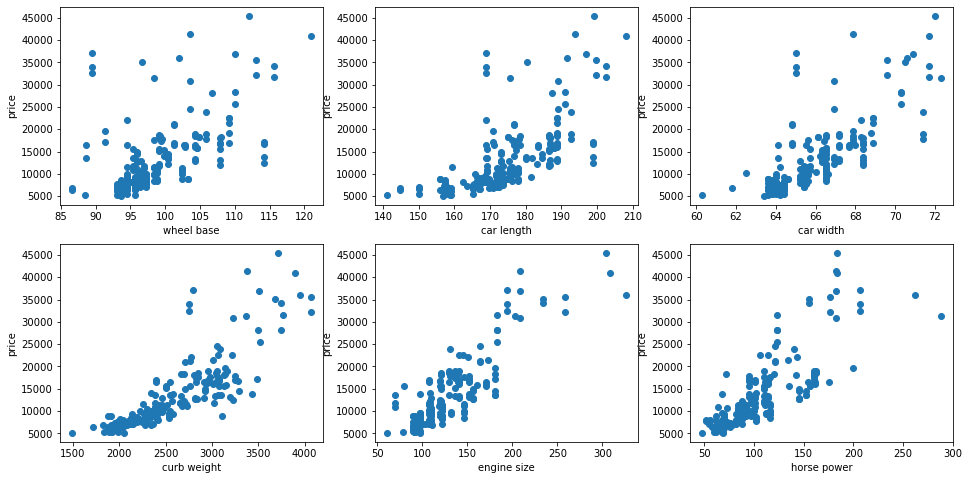

In [41]:
# Doing the scatter plot for some of the variables which are highly correlated with the target variable

plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.xlabel("wheel base")
plt.ylabel("price")
plt.scatter(car_df['wheelbase'],car_df['price'])
plt.subplot(2,3,2)
plt.xlabel("car length")
plt.ylabel("price")
plt.scatter(car_df['carlength'],car_df['price'])
plt.subplot(2,3,3)
plt.xlabel("car width")
plt.ylabel("price")
plt.scatter(car_df['carwidth'],car_df['price'])
plt.subplot(2,3,4)
plt.xlabel("curb weight")
plt.ylabel("price")
plt.scatter(car_df['curbweight'],car_df['price'])
plt.subplot(2,3,5)
plt.xlabel("engine size")
plt.ylabel("price")
plt.scatter(car_df['enginesize'],car_df['price'])
plt.subplot(2,3,6)
plt.xlabel("horse power")
plt.ylabel("price")
plt.scatter(car_df['horsepower'],car_df['price'])

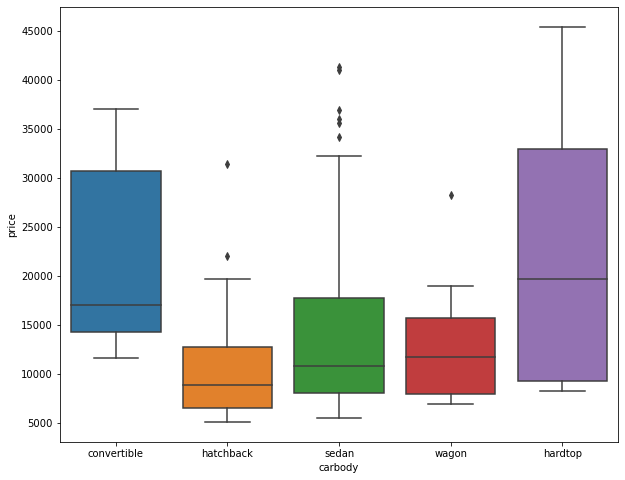

In [42]:
# Created a box plot to check the price distribution across various categories of car body
plt.figure(figsize=(10,8))
sns.boxplot(x= car_df.carbody, y = car_df.price)

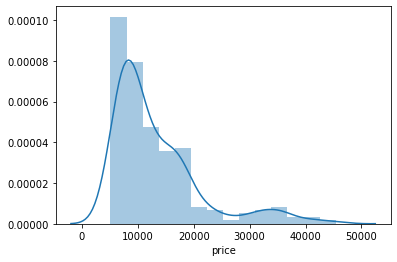

In [43]:
# Checking the distribution of price data
sns.distplot(car_df.price)

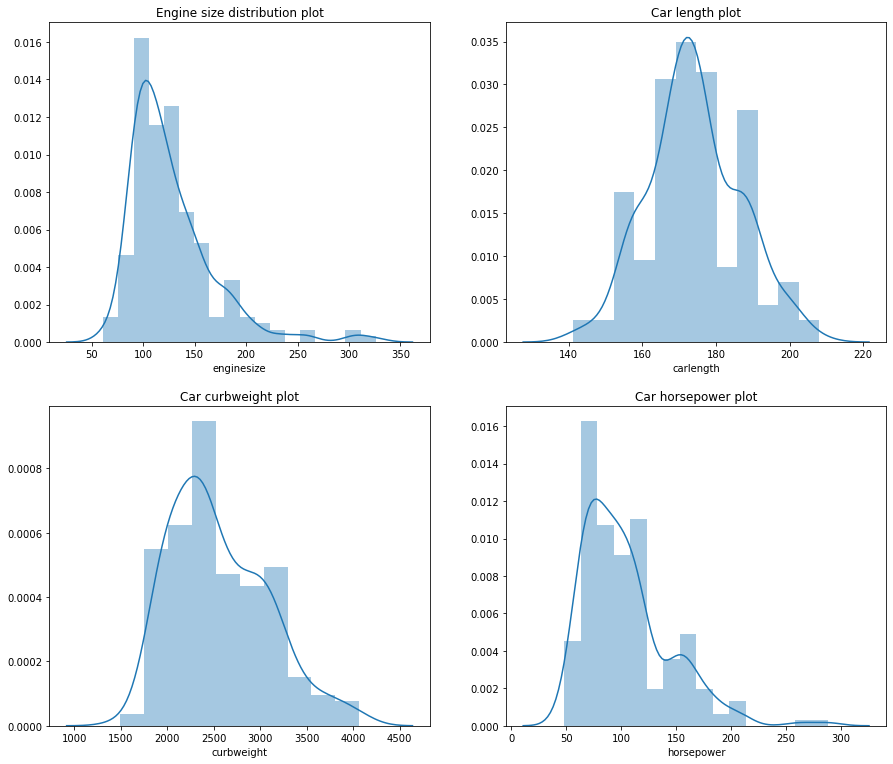

In [44]:
# Checking the data distribution across multiple variables

fig = plt.figure(figsize=(15,20),edgecolor='b')

plt.subplot(3,2,1)
plt.title('Engine size distribution plot')
sns.distplot(car_df.enginesize) 

plt.subplot(3,2,2)
plt.title('Car length plot')
sns.distplot(car_df.carlength) 

plt.subplot(3,2,3)
plt.title('Car curbweight plot')
sns.distplot(car_df.curbweight) 

plt.subplot(3,2,4)
plt.title('Car horsepower plot')
sns.distplot(car_df.horsepower) 

### Outlier Analysis

In [45]:
# Doing describe to check the spread of values and also to detect outliers across all numerical fields
car_df.describe(percentiles=[0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.85,0.9,0.95])

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
5%,93.020000,157.140000,63.600000,49.700000,1901.000000,90.000000,2.970000,2.640000,7.500000,62.000000,4250.000000,16.000000,22.000000,6197.000000
10%,93.700000,157.300000,63.800000,50.600000,1947.000000,91.000000,2.970000,2.882000,8.000000,68.000000,4500.000000,17.000000,23.000000,6657.000000
20%,94.500000,165.300000,63.900000,51.400000,2048.000000,97.000000,3.050000,3.070000,8.500000,69.000000,4800.000000,19.000000,24.800000,7385.800000
30%,95.300000,168.720000,64.400000,52.420000,2242.800000,98.000000,3.150000,3.150000,8.700000,76.000000,4800.000000,21.000000,26.000000,8022.000000
40%,95.960000,171.500000,65.200000,53.000000,2333.400000,109.000000,3.190000,3.230000,9.000000,87.200000,5000.000000,23.600000,29.000000,9036.600000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000


In [46]:
# for col in car_num_cols:
#     car_df[col] = boxcox(car_df[col])[0]

## Data preparation

In [47]:
# Creating dummy variables inorder to convert categorical variables to numeric
car_dummies = pd.get_dummies(car_df[car_cat_cols], drop_first=True)
car_dummies.head()

,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [48]:
# Dropping all the original categorical variables as we already created dummies for each
car_df = car_df.drop(list(car_cat_cols), axis=1)

In [49]:
# Concatting all the dummy variables with the original dataframe
car_df = pd.concat([car_df, car_dummies], axis=1)

In [50]:
# Checking the final dataframe shape
car_df.shape

(205, 43)

In [51]:
# Printing couple of rows to check whether the joining worked
car_df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [52]:
# Dividing the entire data into X and y that is all independent feature into X and dependent feature to y
X=car_df
y=car_df.pop('price')

In [53]:
# splitting into train and test set
# df_train, df_test = train_test_split(car_df, train_size=0.7, test_size = 0.3, random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [54]:
# Performed scaling using StandardScaler on all numeric variables except price that is the target feature
car_num_cols.remove('price')
scaler=StandardScaler()
scaler.fit(X_train[car_num_cols])

X_train[car_num_cols] = scaler.transform(X_train[car_num_cols])
X_test[car_num_cols] = scaler.transform(X_test[car_num_cols])

## Model building

In [55]:
# Created a method to perform and print the VIF
def calc_vif(df):
    vif=pd.DataFrame()
    vif['Features']=df.columns
    vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False)
    print(vif)

In [56]:
# Used sklearn LinearRegression class to do RFE, to select the top 15 features
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [57]:
# list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [58]:
# creating a list having the column names of only those 15 columns shortlisted by RFE
select_col = X_train.columns[rfe.support_]
select_col

Index(['carwidth', 'enginesize', 'compressionratio', 'fueltype_gas',
       'carbody_hardtop', 'drivewheel_rwd', 'enginelocation_rear',
       'enginetype_l', 'enginetype_ohcv', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_twelve',
       'fuelsystem_idi', 'fuelsystem_spdi'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [59]:
# Build the first model with all the columns selected in RFE
X_rfe = X_train[select_col]
X_train_rfe = sm.add_constant(X_rfe)
lm_rfe = sm.OLS(y_train, X_train_rfe).fit()
print(lm_rfe.summary())

#Calculate VIF
calc_vif(X_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     94.23
Date:                Sat, 13 Mar 2021   Prob (F-statistic):           2.94e-60
Time:                        23:54:33   Log-Likelihood:                -1315.3
No. Observations:                 143   AIC:                             2661.
Df Residuals:                     128   BIC:                             2705.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.619e+

In [60]:
# Re-Build the model after removing the least significant/high correlated variable
X_rfe = X_rfe.drop('fueltype_gas',axis=1)
X_train_rfe = sm.add_constant(X_rfe)
lm_rfe = sm.OLS(y_train, X_train_rfe).fit()
print(lm_rfe.summary())

#Calculate VIF
calc_vif(X_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     94.23
Date:                Sat, 13 Mar 2021   Prob (F-statistic):           2.94e-60
Time:                        23:54:33   Log-Likelihood:                -1315.3
No. Observations:                 143   AIC:                             2661.
Df Residuals:                     128   BIC:                             2705.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.739e+

In [61]:
# Re-Build the model after removing the least significant/high correlated variable
X_rfe = X_rfe.drop('cylindernumber_twelve',axis=1)
X_train_rfe = sm.add_constant(X_rfe)
lm_rfe = sm.OLS(y_train, X_train_rfe).fit()
print(lm_rfe.summary())

#Calculate VIF
calc_vif(X_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     101.0
Date:                Sat, 13 Mar 2021   Prob (F-statistic):           5.75e-61
Time:                        23:54:33   Log-Likelihood:                -1316.1
No. Observations:                 143   AIC:                             2660.
Df Residuals:                     129   BIC:                             2702.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.686e+04   1

In [62]:
# Re-Build the model after removing the least significant/high correlated variable
X_rfe = X_rfe.drop('fuelsystem_idi',axis=1)
X_train_rfe = sm.add_constant(X_rfe)
lm_rfe = sm.OLS(y_train, X_train_rfe).fit()
print(lm_rfe.summary())

#Calculate VIF
calc_vif(X_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     101.2
Date:                Sat, 13 Mar 2021   Prob (F-statistic):           8.14e-60
Time:                        23:54:33   Log-Likelihood:                -1321.7
No. Observations:                 143   AIC:                             2669.
Df Residuals:                     130   BIC:                             2708.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.729e+04   1

In [63]:
# Re-Build the model after removing the least significant/high correlated variable
X_rfe = X_rfe.drop('compressionratio',axis=1)
X_train_rfe = sm.add_constant(X_rfe)
lm_rfe = sm.OLS(y_train, X_train_rfe).fit()
print(lm_rfe.summary())

#Calculate VIF
calc_vif(X_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     111.2
Date:                Sat, 13 Mar 2021   Prob (F-statistic):           7.73e-61
Time:                        23:54:33   Log-Likelihood:                -1321.7
No. Observations:                 143   AIC:                             2667.
Df Residuals:                     131   BIC:                             2703.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.728e+04   1

In [64]:
# Re-Build the model after removing the least significant/high correlated variable
X_rfe = X_rfe.drop('fuelsystem_spdi',axis=1)
X_train_rfe = sm.add_constant(X_rfe)
lm_rfe = sm.OLS(y_train, X_train_rfe).fit()
print(lm_rfe.summary())

#Calculate VIF
calc_vif(X_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     122.1
Date:                Sat, 13 Mar 2021   Prob (F-statistic):           1.20e-61
Time:                        23:54:33   Log-Likelihood:                -1322.3
No. Observations:                 143   AIC:                             2667.
Df Residuals:                     132   BIC:                             2699.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.727e+04   1

In [65]:
# Re-Build the model after removing the least significant/high correlated variable
X_rfe = X_rfe.drop('cylindernumber_five',axis=1)
X_train_rfe = sm.add_constant(X_rfe)
lm_rfe = sm.OLS(y_train, X_train_rfe).fit()
print(lm_rfe.summary())

#Calculate VIF
calc_vif(X_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     132.8
Date:                Sat, 13 Mar 2021   Prob (F-statistic):           5.65e-62
Time:                        23:54:33   Log-Likelihood:                -1324.2
No. Observations:                 143   AIC:                             2668.
Df Residuals:                     133   BIC:                             2698.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.536e+04    

In [66]:
# Re-Build the model after removing the least significant/high correlated variable
X_rfe = X_rfe.drop('enginetype_ohcv',axis=1)
X_train_rfe = sm.add_constant(X_rfe)
lm_rfe = sm.OLS(y_train, X_train_rfe).fit()
print(lm_rfe.summary())

#Calculate VIF
calc_vif(X_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     147.2
Date:                Sat, 13 Mar 2021   Prob (F-statistic):           1.68e-62
Time:                        23:54:33   Log-Likelihood:                -1325.7
No. Observations:                 143   AIC:                             2669.
Df Residuals:                     134   BIC:                             2696.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.492e+04    

### Residual Analysis of the train data

In [67]:
# Used training data to predict the target value that is the price
y_train_pred = lm_rfe.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

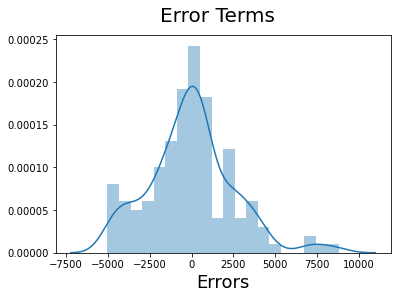

In [68]:
# Plotting a distribution plot of the difference between actual and predicted values that is the residuals of the target 
# variable to check whether the data is normally distributed
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins=20)
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)

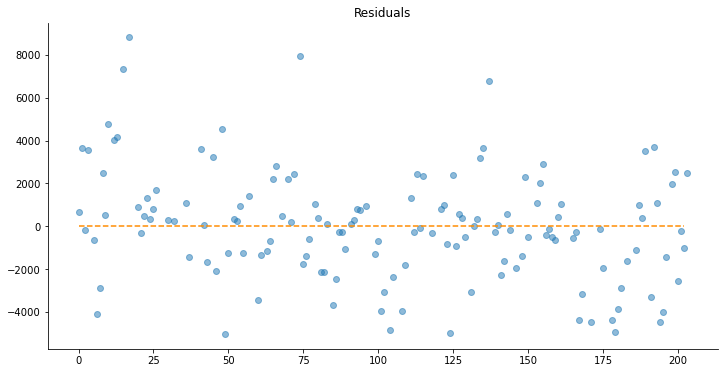

In [69]:
# Also plotting a scatter plot to check whether the residuals are not having any pattern that is, it is homoscedastic
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=y_train.index, y=y_train - y_train_pred, alpha=0.5)
plt.plot(np.repeat(0, y_train.index.max()), color='darkorange', linestyle='--')
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals')
plt.show() 

## Prediction and Model evaluation

In [70]:
# Dropping the constant
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [71]:
# Checking the final list of columns
X_train_rfe.columns

Index(['carwidth', 'enginesize', 'carbody_hardtop', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_l', 'cylindernumber_four',
       'cylindernumber_six'],
      dtype='object')

In [72]:
# Considering only the final list of columns in the test set as well
X_test_new = X_test[X_train_rfe.columns]

In [73]:
# Calculating R2 score

lm_model = LinearRegression()
lm_model.fit(X_train_rfe,y_train)

y_train_pred = lm_model.predict(X_train_rfe)
y_test_pred = lm_model.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_train_pred)
print("R2 score on Training data : ",round(r2_train_lr,2)*100)

r2_test_lr = r2_score(y_test, y_test_pred)
print("R2 score on Test data : ",round(r2_test_lr,2)*100)

R2 score on Training data :  90.0
R2 score on Test data :  82.0


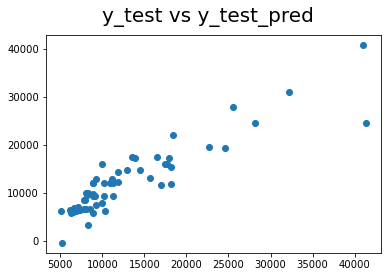

In [74]:
# Plotting a scatter plot of the actual and predicted values of the test set
fig = plt.figure()
fig.suptitle('y_test vs y_test_pred',fontsize=20)
plt.scatter(y_test,y_test_pred)

In [75]:
# Printing the final model coefficients values
lm_model.coef_

array([ 2497.74335426,  3716.92051603, -3195.98989392,  2965.13656996,
       16789.18257722, -2655.35810632, -2944.04306319, -2736.80063344])

In [76]:
# Creating a dataframe containing the features names and its corresponding coefficient values
linear_model_parameter = list(abs(lm_model.coef_))
cols = X_train_rfe.columns
lm_model_df = pd.DataFrame(list(zip(cols,linear_model_parameter)))
lm_model_df.columns = ['Feaure','Coef']

In [77]:
# Sorted the created dataframe containing the features names and its corresponding coefficient values in descending order 
# inorder to get the top coefficients
lm_model_df.sort_values(by='Coef',ascending=False).reset_index(drop=True)

,Feaure,Coef
0,enginelocation_rear,16789.182577
1,enginesize,3716.920516
2,carbody_hardtop,3195.989894
3,drivewheel_rwd,2965.136570
4,cylindernumber_four,2944.043063
5,cylindernumber_six,2736.800633
6,enginetype_l,2655.358106
7,carwidth,2497.743354


### We see that the above 8 features are the most significant features in predicting the price of the car, hence the company needs to focus on these features in formulating their buisness strategy to enter the US market.